## Observable Trends

1) There is a high concentration of individual tweets with neutral polarity for all media sources.

2) CBS and BBC had the most positive tweet polarity, while CNN and Fox News had the most negative tweet polarity. 

3) Out of the total individual tweets gathered, there is a fairly equal distribution of both positive and negative tweets. 

In [1]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import datetime
import seaborn as sns
import os
from dateutil.parser import parse

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
#Keys
file_name = "/Users/acollier/Documents/api_keys.json"
data = json.load(open(file_name))

consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
target_user = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")

In [5]:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
text_list = []
source_list = []
date_list = []
tweet_count = []

In [6]:
for user in target_user:
    counter = 0
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            text_list.append(tweet['text'])
            date_list.append(parse(tweet['created_at']))
            source_list.append(user)
            tweet_count.append(counter)
            counter += 1

In [7]:
news_tweets = {"Date": date_list,
              "User": source_list,
              "Tweet Text": text_list,
              "Compound": compound_list,
              "Positive": positive_list,
              "Neutral": negative_list,
              "Negative": neutral_list,
              "Tweet Count": tweet_count
             }

In [8]:
news_tweets_pd = pd.DataFrame.from_dict(news_tweets)
news_tweets_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Count,Tweet Text,User
0,0.0000,2018-02-02 20:04:03+00:00,1.00,0.0,0.00,0,A young woman investigates the historic disapp...,@BBC
1,0.0000,2018-02-02 19:32:04+00:00,1.00,0.0,0.00,1,"Tonight, @NigelSlater cooks and eats with the ...",@BBC
2,0.0000,2018-02-02 19:00:07+00:00,1.00,0.0,0.00,2,🤼 Ever heard of the Russian martial art 'Syste...,@BBC
3,0.4588,2018-02-02 18:30:06+00:00,0.85,0.0,0.15,3,🍞😋 When toast gets really tasty...\n\nHere are...,@BBC
4,0.0000,2018-02-02 17:31:01+00:00,1.00,0.0,0.00,4,'Oh hey............ man.'\n\n😂 When you run in...,@BBC


In [9]:
news_tweets_pd = news_tweets_pd[["User", "Tweet Count", "Tweet Text", "Date", "Compound", "Positive", "Neutral", "Negative"]]
news_tweets_pd.head()

,User,Tweet Count,Tweet Text,Date,Compound,Positive,Neutral,Negative
0,@BBC,0,A young woman investigates the historic disapp...,2018-02-02 20:04:03+00:00,0.0000,0.00,0.0,1.00
1,@BBC,1,"Tonight, @NigelSlater cooks and eats with the ...",2018-02-02 19:32:04+00:00,0.0000,0.00,0.0,1.00
2,@BBC,2,🤼 Ever heard of the Russian martial art 'Syste...,2018-02-02 19:00:07+00:00,0.0000,0.00,0.0,1.00
3,@BBC,3,🍞😋 When toast gets really tasty...\n\nHere are...,2018-02-02 18:30:06+00:00,0.4588,0.15,0.0,0.85
4,@BBC,4,'Oh hey............ man.'\n\n😂 When you run in...,2018-02-02 17:31:01+00:00,0.0000,0.00,0.0,1.00


In [10]:
news_tweets_pd.to_csv("news_tweets.csv", index=False)

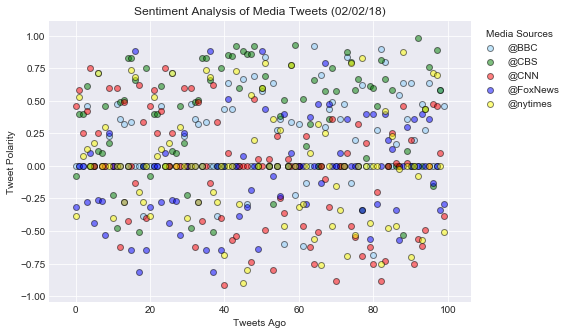

In [11]:
sns.set_style('darkgrid')
today_date = datetime.datetime.now().strftime('%m/%d/%y')
user_type = news_tweets_pd["User"].unique()
colors = ["lightskyblue", "green", "red", "blue", "yellow"]

tweets_facetgrid = sns.FacetGrid(data=news_tweets_pd, hue="User", hue_order=user_type, palette=colors)
tweets_facetgrid.map(plt.scatter, 'Tweet Count', 'Compound', alpha=0.5, marker='o', edgecolors="black", linewidth=1)
tweets_facetgrid.fig.set_size_inches(8,5)


plt.title("Sentiment Analysis of Media Tweets (" + today_date + ")")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend(bbox_to_anchor=(1, 1), title="Media Sources")
plt.show()

In [12]:
avg_sentiment = news_tweets_pd.groupby(['User']).agg({'Compound':'mean'})
avg_sentiment = avg_sentiment.reset_index()
avg_sentiment

,User,Compound
0,@BBC,0.208463
1,@CBS,0.341264
2,@CNN,-0.042276
3,@FoxNews,-0.036477
4,@nytimes,0.022969


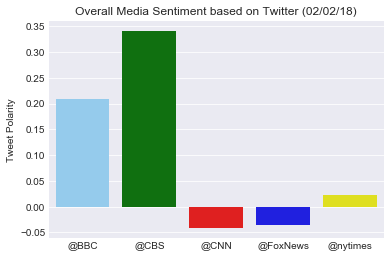

In [13]:
sentiment_plot = sns.barplot(data=avg_sentiment, palette=colors, x="User", y="Compound")

plt.title("Overall Media Sentiment based on Twitter (" + today_date + ")")
plt.xlabel("")
plt.ylabel("Tweet Polarity")

plt.show()
plt.gcf().clear()